In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error

import joblib

In [28]:
df = pd.read_csv(r"./canada_income.csv")

In [29]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [30]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [31]:
df.rename(columns={'per capita income (US$)' : 'pci'} , inplace= True)

In [32]:
df.head()

,year,pci
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


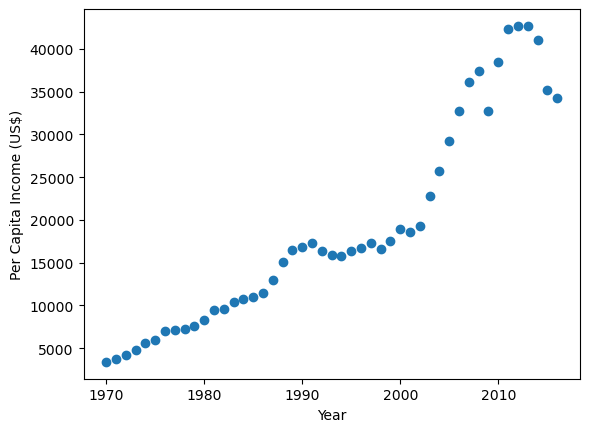

In [33]:
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')

plt.scatter(df.year,df.pci)
plt.show()

In [34]:
TEST_RATIO = 0.2

X_train,X_test,y_train,y_test = train_test_split(df.year , df.pci , test_size= TEST_RATIO)

In [35]:
X_train = np.array(X_train)
X_train = X_train.reshape(-1 , 1 )
# X_train

In [36]:
X_test = np.array(X_test)
X_test = X_test.reshape(-1 , 1)
# X_test

Training the model

In [37]:
reg = linear_model.LinearRegression()

In [38]:
reg.fit(X_train , y_train)

LinearRegression()

In [39]:
reg.coef_ , reg.intercept_

(array([853.84402115]), -1683090.2504204672)

In [40]:
y_pred = reg.coef_ * df.year + reg.intercept_

Plotting results

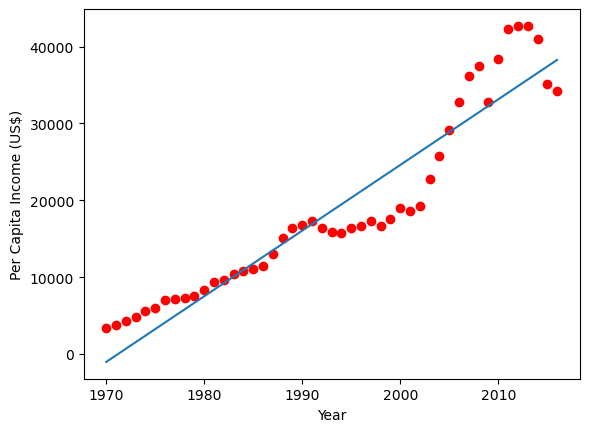

In [41]:
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')

plt.scatter(df.year,df.pci , color = "red")
plt.plot(df.year , y_pred )
plt.show()

In [42]:
y_pred = reg.predict(X_test)

In [43]:
y_pred

array([ 8374.75547495, 34843.92013055, -1017.52875769,  -163.68473654,
       16913.19568643, 37405.452194  , 32282.38806711,  7520.9114538 ,
       38259.29621515,  5813.2234115 ])

In [44]:
# Mean square error

mean_squared_error(y_test , y_pred)

12158465.529957635

In [45]:
# R2 Score
r2_score(y_test , y_pred)

0.9410432220054494

In [46]:
joblib.dump(reg , 'model/lr_model')

['model/lr_model']

In [47]:
del reg

In [48]:
reg = joblib.load(r"model/lr_model")

In [49]:
y_pred = reg.predict(X_test)


In [50]:
y_pred

array([ 8374.75547495, 34843.92013055, -1017.52875769,  -163.68473654,
       16913.19568643, 37405.452194  , 32282.38806711,  7520.9114538 ,
       38259.29621515,  5813.2234115 ])